# Measles Outbreaks In European Countries 
## Exploratory Data Analysis
---

_Author: Preeya Sawadmanod_ 

In this notebook

### Table of content
---

### Import Packages 

Here are additional packages that might require installation for this notebook

In [1]:
# !pip install geopandas
# !pip install geoplot
# !pip install qgrid

In [2]:
#Import miscellaneous
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import processing tools
import pandas as pd 
import numpy  as np
import datetime 

#Import Visualization tools
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Mapping tools  
import geopandas
import geoplot
import shapely.geometry
import shapely.wkt
from shapely.ops         import cascaded_union
import contextily as ctx


Read in data set from [data cleaning notebook]('./1_data_cleaning.ipynb')

In [3]:
outbreak = pd.read_csv('../data/measles.csv')

#Converting time column into date time object
outbreak['time'] = pd.to_datetime(outbreak['time'])

In [4]:
outbreak.head()

indicator       unit       time regioncode regionname    numvalue
0  Notification rate   N/1000000 1999-01-01         AT    Austria   250549.29
1  Notification rate   N/1000000 1999-01-01         DK    Denmark   188197.14
2  Notification rate   N/1000000 1999-01-01         EL     Greece  1581723.75
3  Notification rate   N/1000000 1999-01-01         FI    Finland        0.00
4  Notification rate   N/1000000 1999-01-01         IE    Ireland  1875666.86

### Recent Outbreaks

Looking at most recent outbreaks by first sorting values 

In [5]:
outbreak[outbreak['indicator'] == 'Reported confirmed cases'].sort_values(by=['time', 'numvalue'], ascending=False).head()

indicator unit       time regioncode regionname  \
24665  Reported confirmed cases    N 2019-08-01         IT      Italy   
24673  Reported confirmed cases    N 2019-08-01         RO    Romania   
24660  Reported confirmed cases    N 2019-08-01         FR     France   
24666  Reported confirmed cases    N 2019-08-01         LT  Lithuania   
24651  Reported confirmed cases    N 2019-08-01         BG   Bulgaria   

       numvalue  
24665      71.0  
24673      65.0  
24660      48.0  
24666      40.0  
24651      38.0

The most recent outbreaks in August in 2019 are going to be plotted into a bar chart

In [6]:
#Assigning new data frame to recent outbreaks
recent_outbreak = outbreak[outbreak['indicator'] == 'Reported confirmed cases'].sort_values(by=['time', 'numvalue'], ascending=False).head(15)

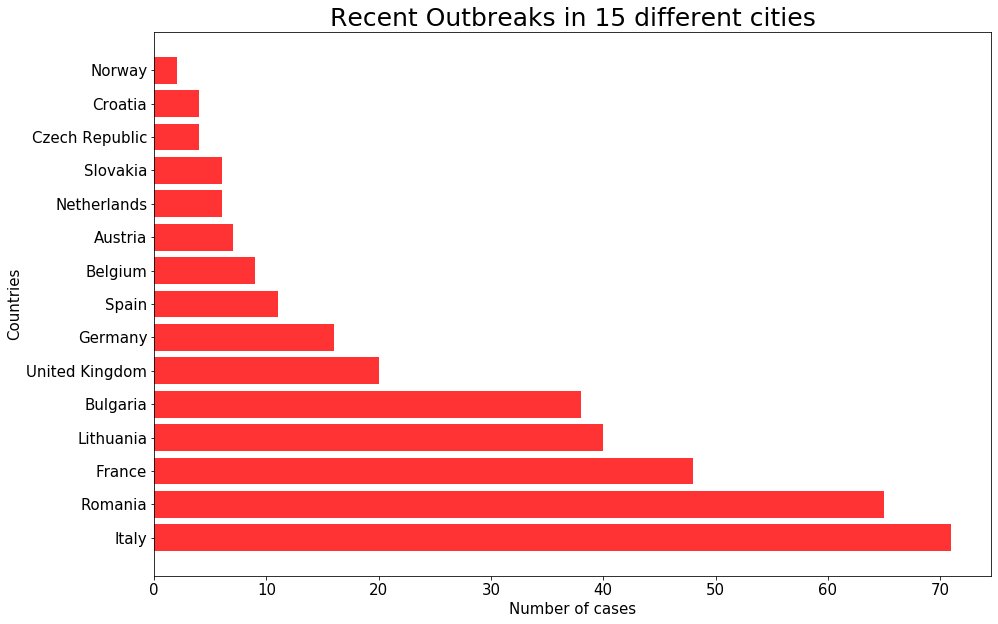

In [7]:
#Plotting Recent outbreaks in 15 different cities
plt.figure(figsize=(15,10))
plt.barh(recent_outbreak['regionname'], recent_outbreak['numvalue'], color='red', alpha=0.8, linewidth=5)

#Settings for figure such as labels, title and sizes
plt.tick_params(labelsize=15)
plt.xlabel("Number of cases", fontsize=15)
plt.ylabel("Countries", fontsize=15)
plt.title("Recent Outbreaks in 15 different cities", fontsize=25)

#Save plot
plt.savefig('../images/recent_outbreaks.jpeg', pad_inches='tight', optimiza=True);

**Observation:**

In [8]:
#Assigning a new data frame to all reported confirmed cases from 1999 to 2019
reported = outbreak.loc[outbreak['indicator'] == 'Reported confirmed cases',:]

#Creating a series with the 15 most recent outbreaks 
recent_outbreak_region = recent_outbreak['regionname'][:15]
recent_outbreak_region

24665             Italy
24673           Romania
24660            France
24666         Lithuania
24651          Bulgaria
24677    United Kingdom
24654           Germany
24658             Spain
24650           Belgium
24649           Austria
24669       Netherlands
24676          Slovakia
24653    Czech Republic
24661           Croatia
24670            Norway
Name: regionname, dtype: object

In [9]:
#Filtering all reported confirmed cases with series of most recent outbreaks
recent_out_region = reported[reported['regionname'].isin(recent_outbreak_region)]
recent_out_region.head()

indicator unit       time regioncode      regionname  \
18499  Reported confirmed cases    N 1999-01-01         AT         Austria   
18504  Reported confirmed cases    N 1999-01-01         IT           Italy   
18505  Reported confirmed cases    N 1999-01-01         NL     Netherlands   
18506  Reported confirmed cases    N 1999-01-01         NO          Norway   
18508  Reported confirmed cases    N 1999-01-01         UK  United Kingdom   

       numvalue  
18499       NaN  
18504     116.0  
18505       NaN  
18506       0.0  
18508       1.0

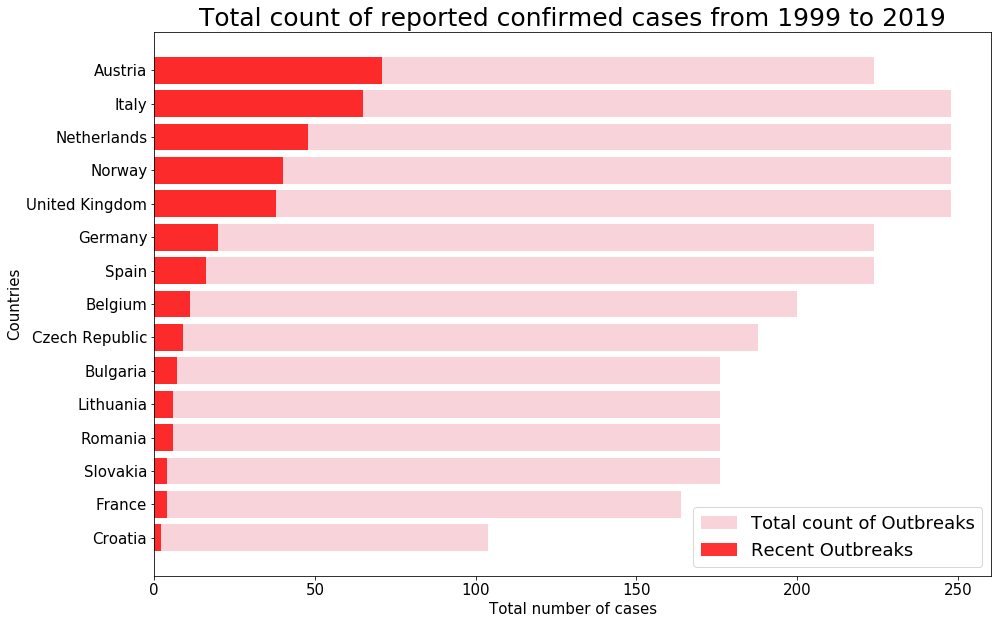

In [10]:
#Plottting all reported confirmed cases and recent countries where recent outbreaks occured
plt.figure(figsize=(15,10))

#Countplot of reported confirmed cases from 1999 to 2019 
sns.countplot(y='regionname', data=recent_out_region, color= "pink",alpha=0.8, label= 'Total count of Outbreaks')

#Plotting Recent outbreaks in 15 different cities
plt.barh(recent_outbreak['regionname'], recent_outbreak['numvalue'], color='red', alpha=0.8, linewidth=5, label= 'Recent Outbreaks');

#Settings for figure such as labels, title and sizes
plt.tick_params(labelsize=15)
plt.xlabel("Total number of cases", fontsize=15)
plt.ylabel("Countries", fontsize=15)
plt.title("Total count of reported confirmed cases from 1999 to 2019", fontsize=25)
plt.legend(fontsize=18);

**Observation**: 

### Outbreak vs. Time

INFORMATION

In [11]:
#Mask for indicators for reported and reported confirmed cases
reported = outbreak['indicator'] == 'Reported cases'
confirmed = outbreak['indicator'] == 'Reported confirmed cases'

In [12]:
#Function for creating data frame for each country
def create_country(country):
    country = outbreak[outbreak['regionname'] == country]
    return country

In [13]:
#Function to plot the country of choice 
def plotting_country(df, title):     
    plt.figure(figsize=(18,7))
    plt.plot(df.loc[reported]['time'], df.loc[reported]['numvalue'], label= 'Number of reported cases', color='pink')
    plt.plot(df.loc[confirmed]['time'], df.loc[confirmed]['numvalue'], label= 'Number of confirmed cases', color='red')
    plt.title(f"Measles cases in {title}", fontsize=25)
    plt.legend(fontsize=15)
    plt.xlabel("Time in Years", fontsize=15)
    plt.ylabel("Number of cases", fontsize=15)
    plt.tick_params(labelsize=15)
    return 

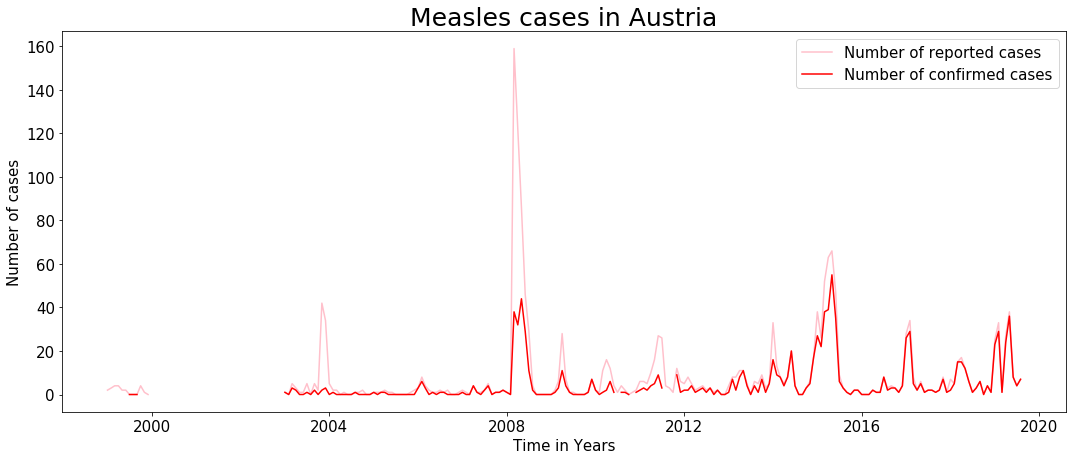

In [14]:
austria = create_country("Austria")
plotting_country(austria, "Austria")

**Observation:** 

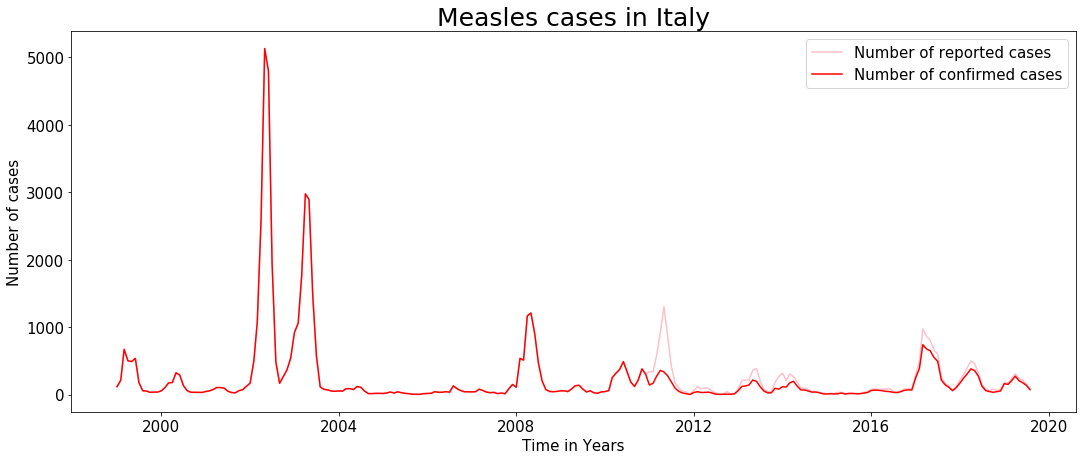

In [15]:
italy = create_country("Italy")
plotting_country(italy, "Italy")

**Observation:**

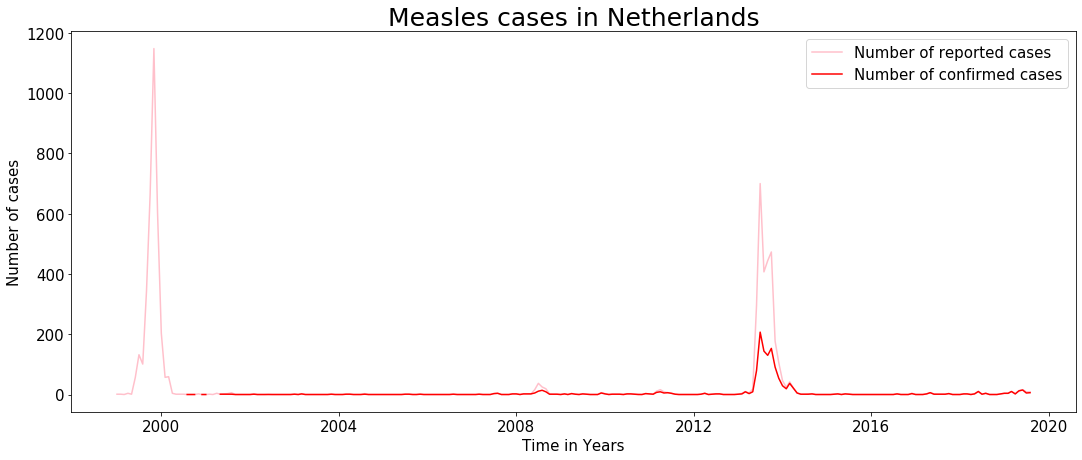

In [16]:
netherlands = create_country("Netherlands")
plotting_country(netherlands, "Netherlands")

**Observation**:

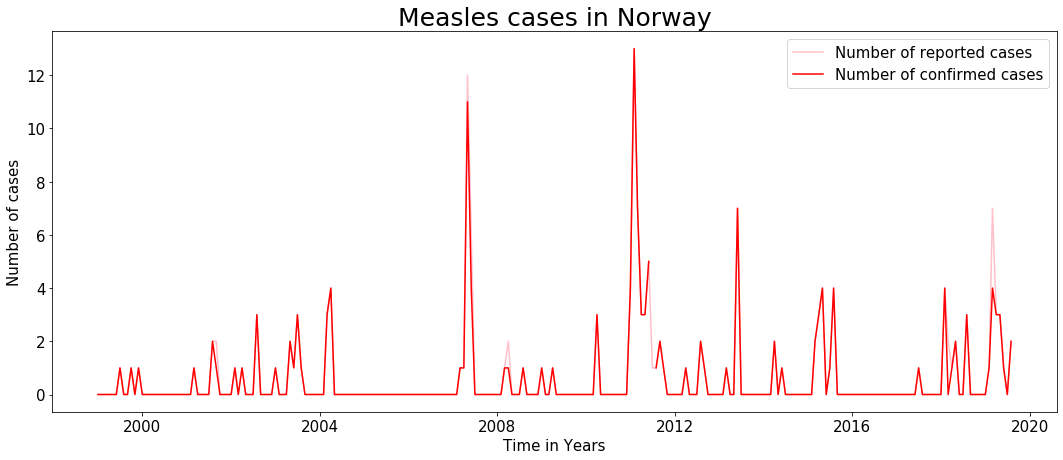

In [17]:
norway = create_country("Norway")
plotting_country(norway, "Norway")

**Observation:** 

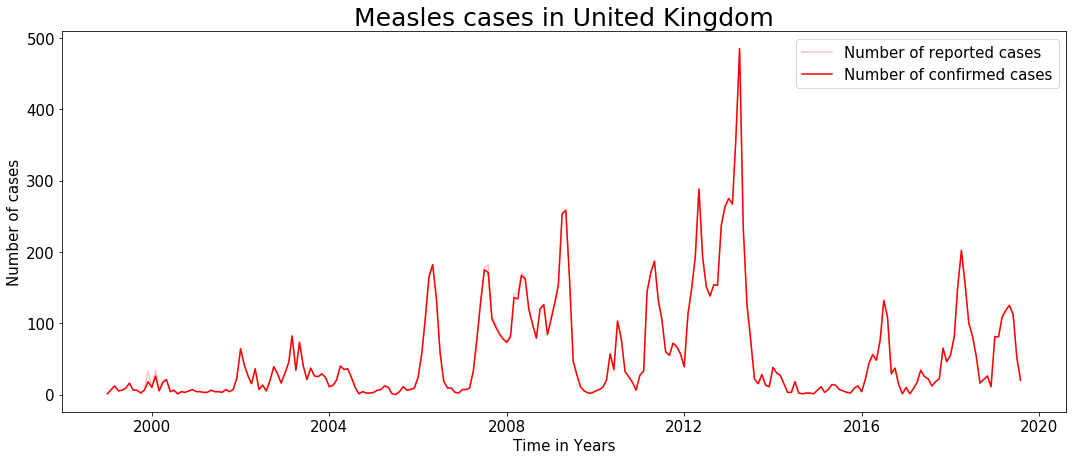

In [18]:
uk = create_country("United Kingdom")
plotting_country(uk, "United Kingdom")

**Observation:** 

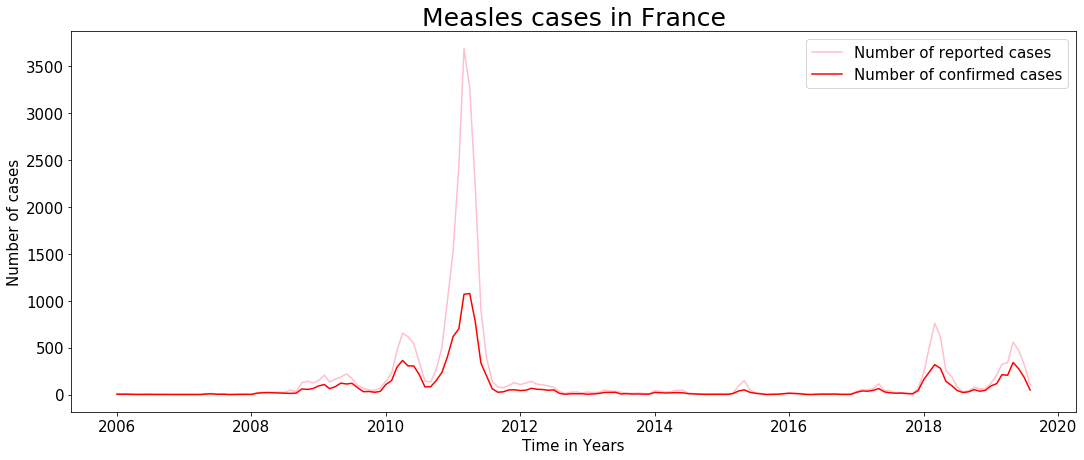

In [19]:
france = create_country("France")
plotting_country(france, "France")

**Observation:** 

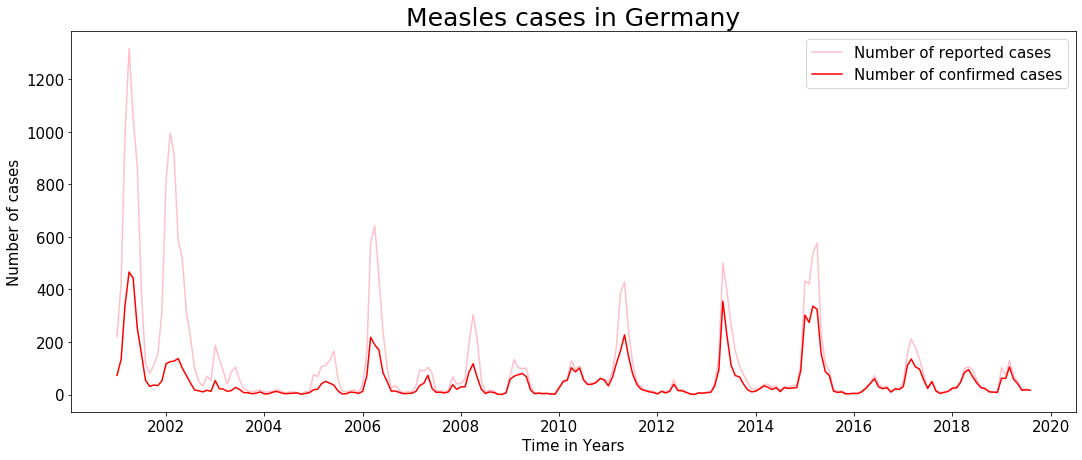

In [20]:
germany = create_country("Germany")
plotting_country(germany, "Germany")

**Observation:** 

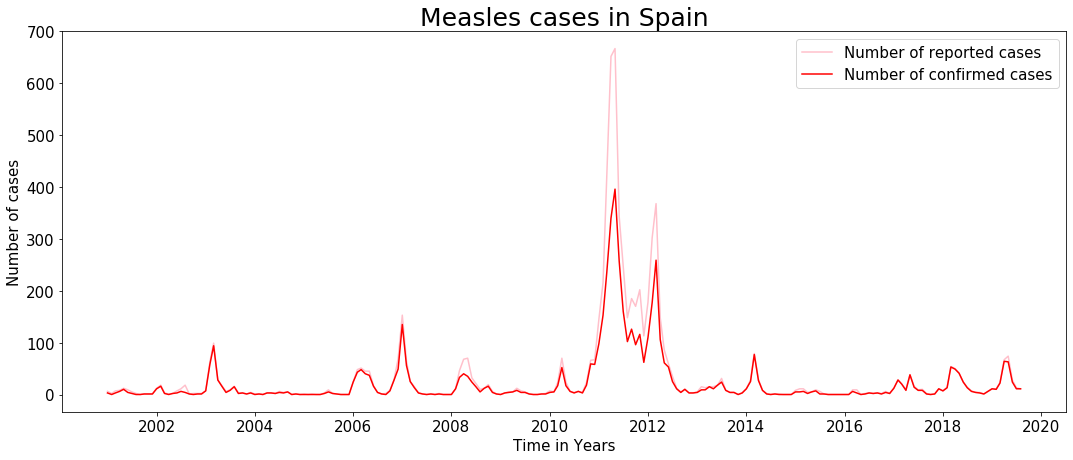

In [21]:
spain = create_country("Spain")
plotting_country(spain, "Spain")

**Observation:** 

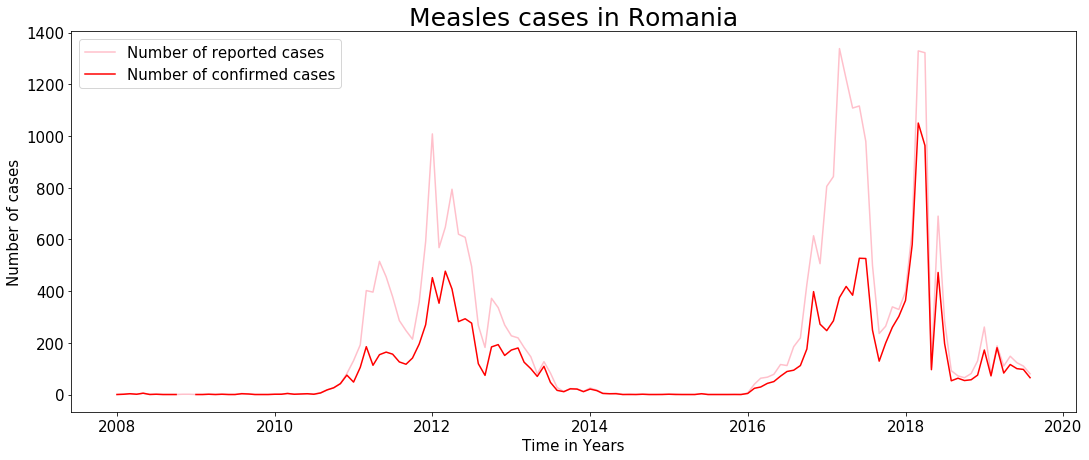

In [22]:
romania = create_country("Romania")
plotting_country(romania, "Romania")

**Observation:** 

### Mapping of Outbreaks

Information

In [23]:
#Loading in world map from GeoPandas's data set
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [24]:
#Converting 
world = world.to_crs(epsg=3857)

In [25]:
#Filtering and assigning GeoPandas data frame for European countries
europe = world[world['continent'] == 'Europe']
europe.head()

pop_est continent     name iso_a3  gdp_md_est  \
18   142257519    Europe   Russia    RUS   3745000.0   
21     5320045    Europe   Norway    -99    364700.0   
43    67106161    Europe   France    -99   2699000.0   
110    9960487    Europe   Sweden    SWE    498100.0   
111    9549747    Europe  Belarus    BLR    165400.0   

                                              geometry  
18   MULTIPOLYGON (((19895609.388 11436139.118, 200...  
21   MULTIPOLYGON (((1685691.012 15333216.867, 1727...  
43   MULTIPOLYGON (((-5750519.703 463075.975, -5816...  
110  POLYGON ((1227561.058 8149359.996, 1276642.191...  
111  POLYGON ((3136616.945 7592158.584, 3253814.546...

In [26]:
#Expanding Multipolygon for european countries and resetting index
europe = europe.loc[europe['name'].isin(outbreak['regionname'])].explode()
europe.reset_index(inplace=True)
europe.head()

level_0  level_1   pop_est continent    name iso_a3  gdp_md_est  \
0       21        0   5320045    Europe  Norway    -99    364700.0   
1       21        1   5320045    Europe  Norway    -99    364700.0   
2       21        2   5320045    Europe  Norway    -99    364700.0   
3       21        3   5320045    Europe  Norway    -99    364700.0   
4       43        0  67106161    Europe  France    -99   2699000.0   

                                            geometry  
0  POLYGON ((1685691.012 15333216.867, 1727962.36...  
1  POLYGON ((3462152.181 10926389.271, 3272742.93...  
2  POLYGON ((3050989.582 15574972.083, 2885918.89...  
3  POLYGON ((2752276.449 14290898.785, 2503610.97...  
4  POLYGON ((-5750519.703 463075.975, -5816369.64...

In [27]:
#Dropping previous index columns
europe.drop(columns=['level_0', 'level_1'], axis=1, inplace=True)
europe.head()

pop_est continent    name iso_a3  gdp_md_est  \
0   5320045    Europe  Norway    -99    364700.0   
1   5320045    Europe  Norway    -99    364700.0   
2   5320045    Europe  Norway    -99    364700.0   
3   5320045    Europe  Norway    -99    364700.0   
4  67106161    Europe  France    -99   2699000.0   

                                            geometry  
0  POLYGON ((1685691.012 15333216.867, 1727962.36...  
1  POLYGON ((3462152.181 10926389.271, 3272742.93...  
2  POLYGON ((3050989.582 15574972.083, 2885918.89...  
3  POLYGON ((2752276.449 14290898.785, 2503610.97...  
4  POLYGON ((-5750519.703 463075.975, -5816369.64...

#### Test plot 

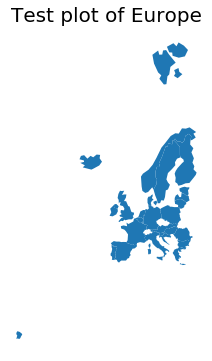

In [28]:
#Test plot for European countries
ax = europe.plot(figsize=(6,6))
plt.title("Test plot of Europe", fontsize=20)

#remove axes
ax.set_axis_off();

**Observation:** 

INFORMATION > FIND INDEX 

In [29]:
# #Iterating through each row in Geometry column
# for index, rows in enumerate(europe['geometry']): 
    
#     #Extracting coordinates from tuples 
#     for x, y in rows.exterior.coords:
#         if x < -40: 
#             print(x,y)
#             print(f"index= {index}")
#             break

Dropping the index, where the isolated was identified

In [30]:
#Dropping the index, where the isolated was identified
europe.drop(index= [0,2,3,4] , axis=0, inplace=True)

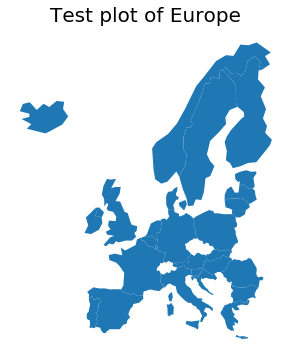

In [31]:
#Test plot 
ax = europe.plot(figsize=(6,6))
plt.title("Test plot of Europe", fontsize=20)

#remove axes
ax.set_axis_off();

#### Combined data frames

In [32]:
#Checking the shape of each data frame and type of each data frame 
print(f"There are {outbreak.shape[0]} rows and {outbreak.shape[1]} columns in outbreak data set, which is {type(outbreak)}")
print(f"There are {europe.shape[0]} rows and {europe.shape[1]} columns in outbreak data set, which is {type(europe)}")

There are 25677 rows and 6 columns in outbreak data set, which is <class 'pandas.core.frame.DataFrame'>
There are 33 rows and 6 columns in outbreak data set, which is <class 'geopandas.geodataframe.GeoDataFrame'>


Combining both outbreak with map GeoPandas data frame 

In [33]:
merge_df = pd.merge(europe, outbreak, how='left', left_on='name',  right_on='regionname')

In [34]:
merge_df.head()

pop_est continent    name iso_a3  gdp_md_est  \
0  5320045    Europe  Norway    -99    364700.0   
1  5320045    Europe  Norway    -99    364700.0   
2  5320045    Europe  Norway    -99    364700.0   
3  5320045    Europe  Norway    -99    364700.0   
4  5320045    Europe  Norway    -99    364700.0   

                                            geometry           indicator  \
0  POLYGON ((3462152.181 10926389.271, 3272742.93...  Notification rate    
1  POLYGON ((3462152.181 10926389.271, 3272742.93...  Notification rate    
2  POLYGON ((3462152.181 10926389.271, 3272742.93...  Notification rate    
3  POLYGON ((3462152.181 10926389.271, 3272742.93...  Notification rate    
4  POLYGON ((3462152.181 10926389.271, 3272742.93...  Notification rate    

        unit       time regioncode regionname  numvalue  
0  N/1000000 1999-01-01         NO     Norway       0.0  
1  N/1000000 1999-02-01         NO     Norway       0.0  
2  N/1000000 1999-03-01         NO     Norway       0.0  
3  N/1000000 1999-05-01         NO     Norway       0.0  
4  N/1000000 1999-06-01         NO     Norway       0.0

In [35]:
#Filtering through data frame to receive reported confirmed cases (outbreaks)
reported = merge_df[merge_df['indicator'] == 'Reported confirmed cases']

In [36]:
reported = reported[reported['time'] > datetime.date(2017,12,1)]
reported.sort_values('numvalue', ascending = False).head()

pop_est continent     name iso_a3  gdp_md_est  \
6511   21529967    Europe  Romania    ROU    441000.0   
6512   21529967    Europe  Romania    ROU    441000.0   
6510   21529967    Europe  Romania    ROU    441000.0   
6514   21529967    Europe  Romania    ROU    441000.0   
21644  62137802    Europe    Italy    ITA   2221000.0   

                                                geometry  \
6511   POLYGON ((3142944.799 5698722.044, 3192618.449...   
6512   POLYGON ((3142944.799 5698722.044, 3192618.449...   
6510   POLYGON ((3142944.799 5698722.044, 3192618.449...   
6514   POLYGON ((3142944.799 5698722.044, 3192618.449...   
21644  POLYGON ((969591.727 4997600.566, 1025253.828 ...   

                      indicator unit       time regioncode regionname  \
6511   Reported confirmed cases    N 2018-03-01         RO    Romania   
6512   Reported confirmed cases    N 2018-04-01         RO    Romania   
6510   Reported confirmed cases    N 2018-02-01         RO    Romania   
6514   Reported confirmed cases    N 2018-06-01         RO    Romania   
21644  Reported confirmed cases    N 2018-04-01         IT      Italy   

       numvalue  
6511     1050.0  
6512      963.0  
6510      580.0  
6514      472.0  
21644     381.0

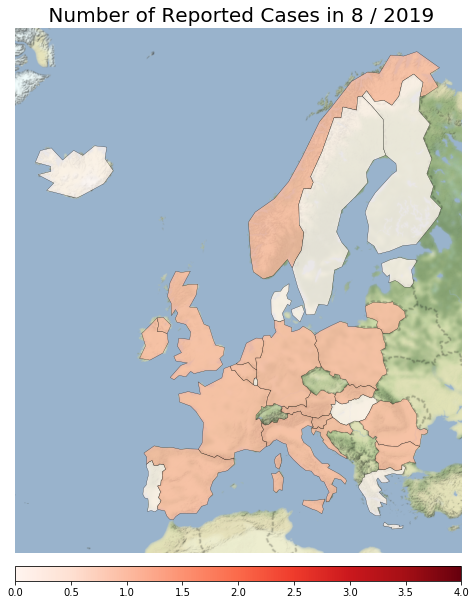

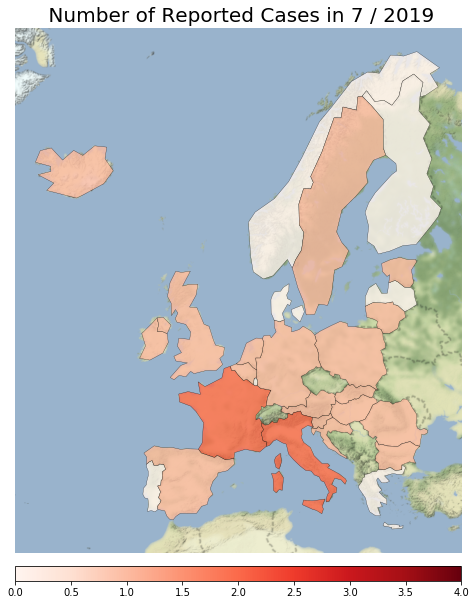

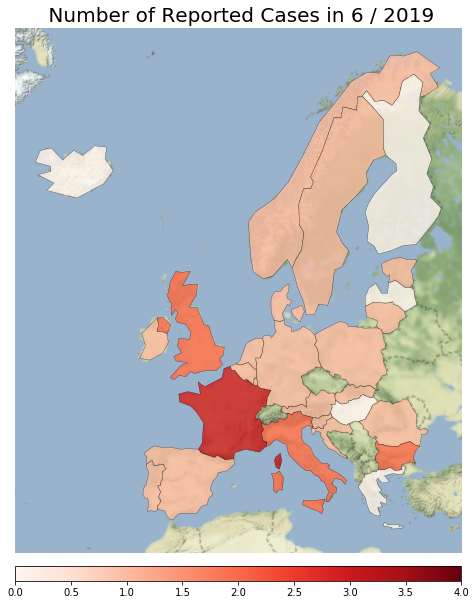

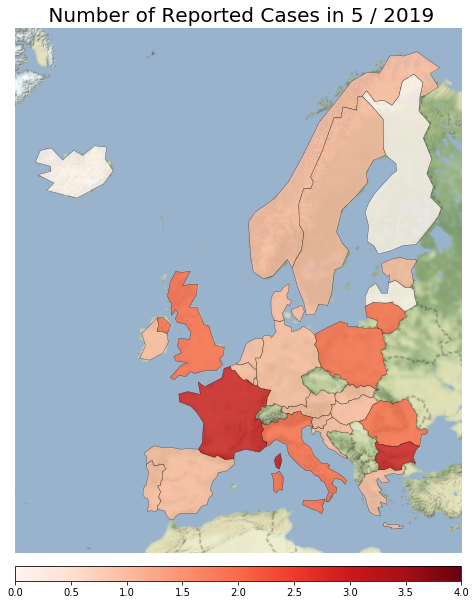

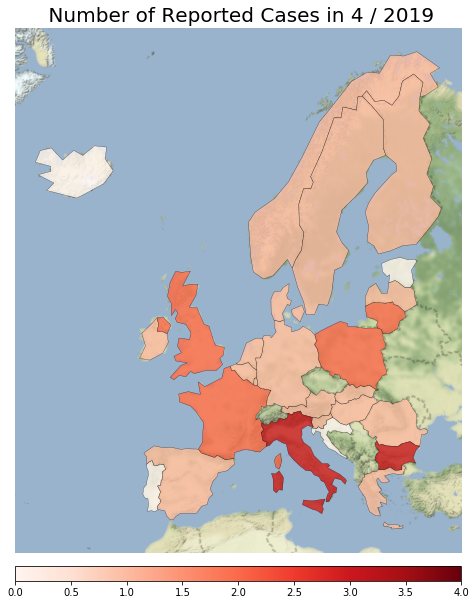

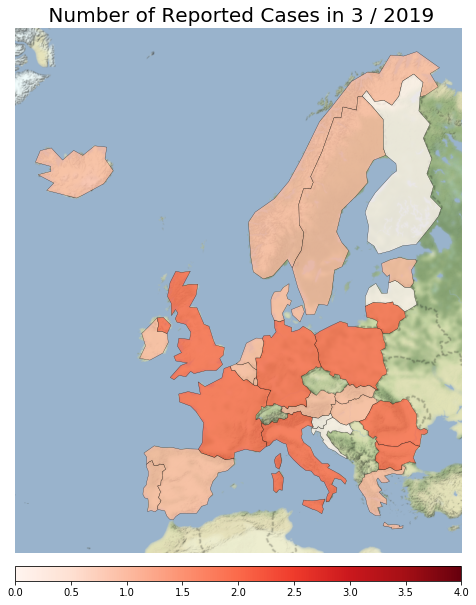

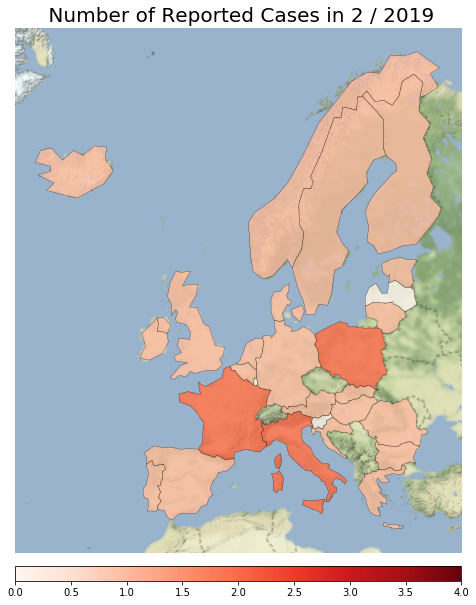

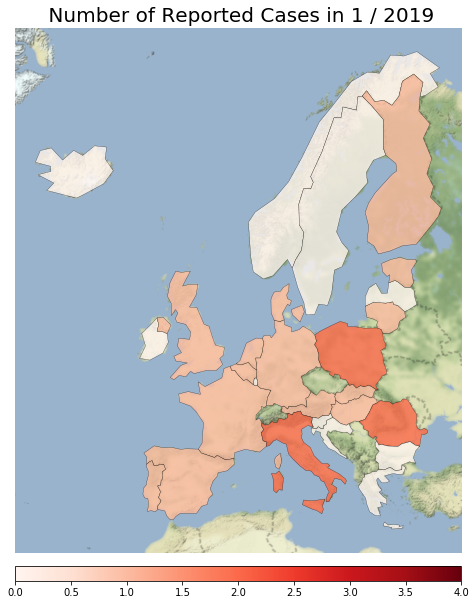

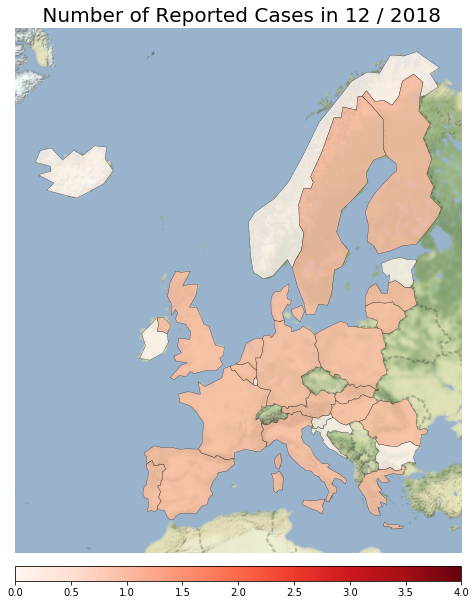

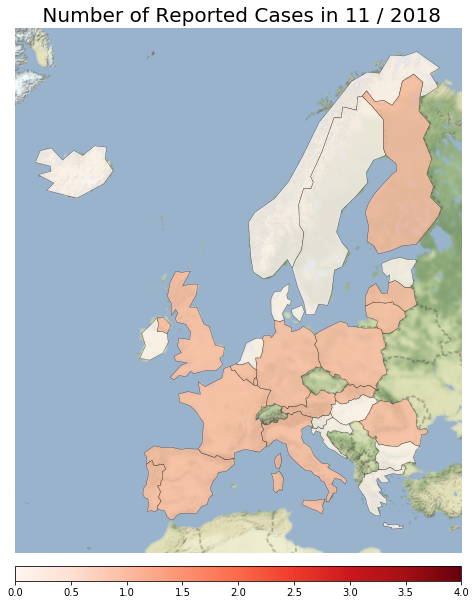

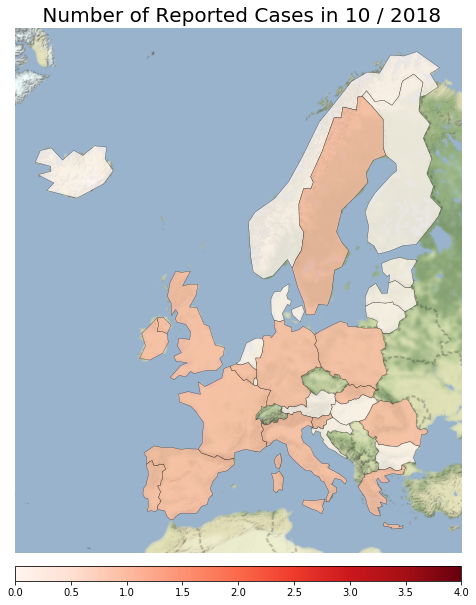

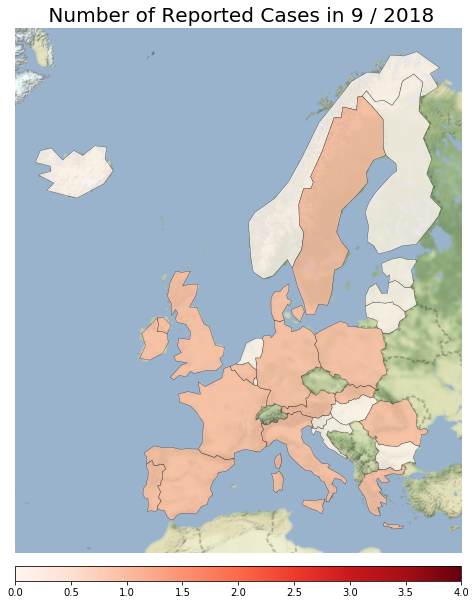

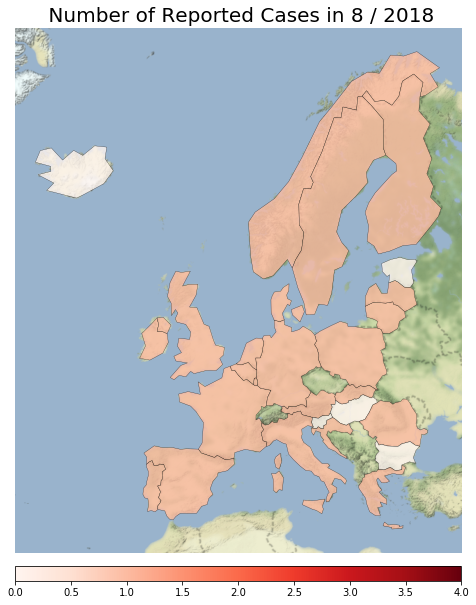

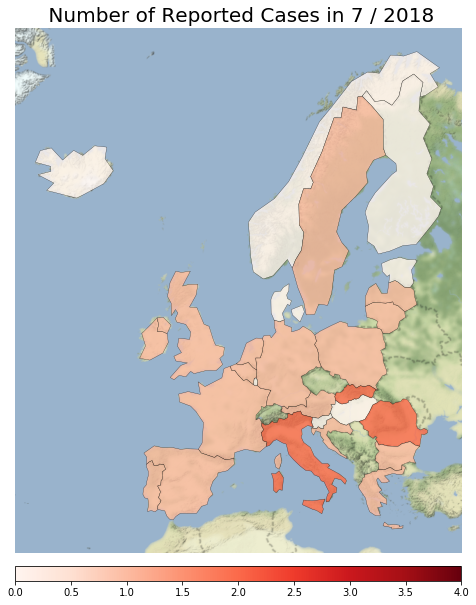

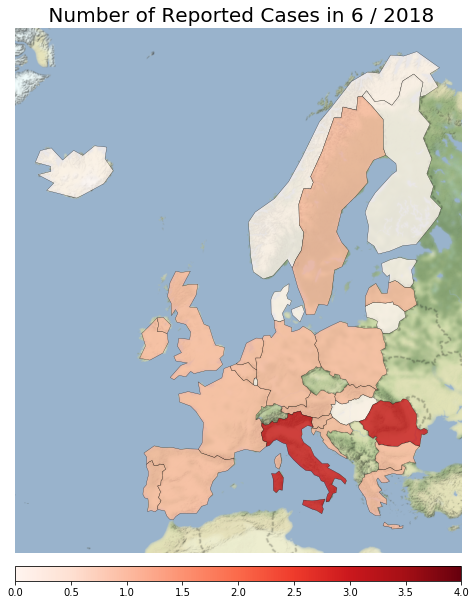

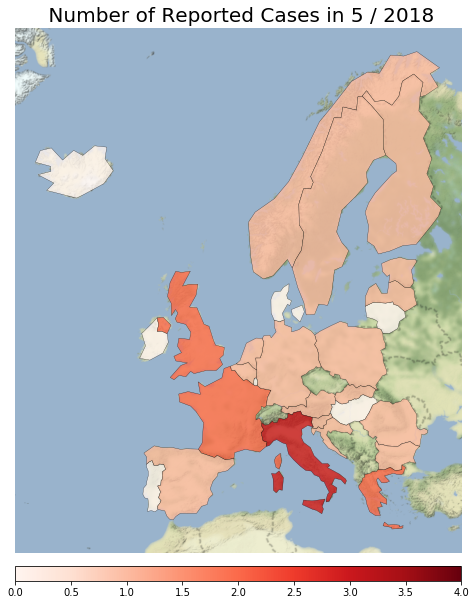

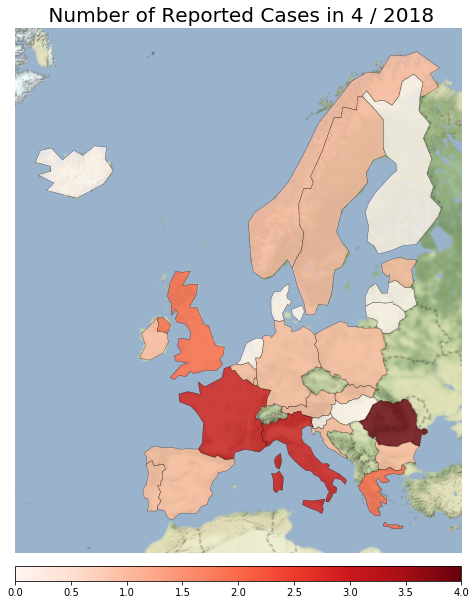

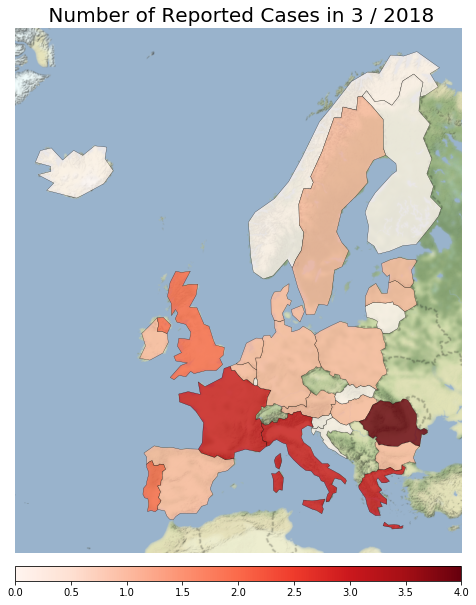

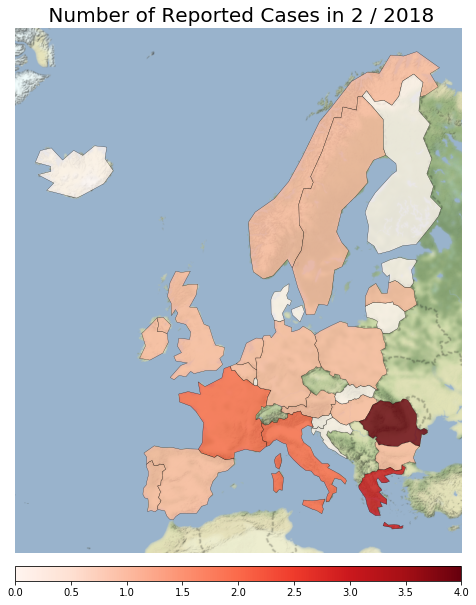

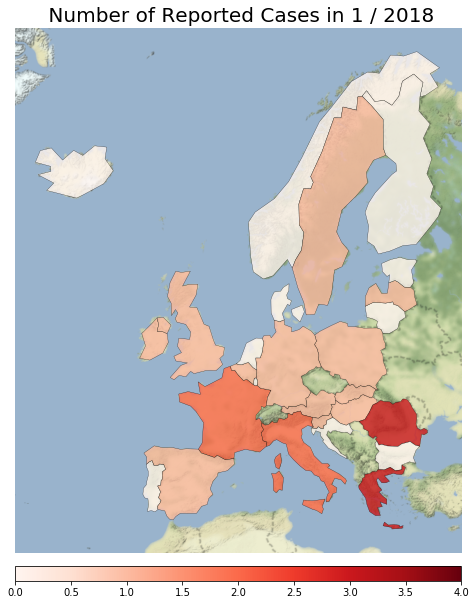

In [42]:
#Creating a list of dates 
date_list = list(set(reported['time']))
date_list.sort(reverse = True)

#Defining legend list
bins_list= [0, 100, 250, 500, reported['numvalue'].max()]

# set the range for the choropleth values
vmin, vmax = 0, 4

for index, date in enumerate(date_list):
    
    #Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(8, 12))
    
    #Create colorbar legend
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    #Empty array for the data range
    sm.set_array([]) 
    
    #Add the colorbar to the figure
    fig.colorbar(sm, orientation="horizontal", fraction=0.030, pad=0.02, aspect = 30, ax=ax)
    
    #Creating monthly data frame 
    month_df = reported[reported['time'] == date]
    
    #Creating plot 
    month_df.plot(column='numvalue',
                       cmap = 'Reds',
                       edgecolor = 'k',
                       alpha=0.8, 
                       linewidth = 0.3,
                       ax=ax, 
                       scheme='UserDefined', 
                       classification_kwds= dict(bins=bins_list), 
                       vmin=vmin,
                       vmax=vmax)     
    
    ctx.add_basemap(ax=ax,url=ctx.sources.ST_TERRAIN_BACKGROUND, zoom=4)
    
    #Adding title to map
    ax.set_title(f" Number of Reported Cases in {date.month} / {date.year}", fontdict= {'fontsize':20, 'fontweight' : '1'})
        
    #Removing axes
    ax.set_axis_off()

    #Creating filename
    file_name = (4-len(str(index)))*'0'+str(index)

    #Saving the plot to the images folder 
    plt.savefig(f'../images/timelapse/{file_name}_map.png',bbox_inches='tight');

In [43]:
# Creates a gif based on the 64 pngs that we generated above. 
import os
import imageio

png_dir = '../images/timelapse/'
images = []
dir_list = os.listdir(png_dir)

# sorts the images into 000->064
dir_list.sort()

# for loop to make the gif
for file_name in dir_list:
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        
imageio.mimsave('../images/map.gif', images, fps = 5,  duration=1)